In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans

import seaborn as sns
import numpy as np

Columns list:  ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
Dimensions: (1453, 15) 

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female   

yummy             0.6
convenient        0.9
spicy             0.2
fattening         1.0
greasy            0.7
fast              0.9
cheap             0.6
tasty             0.7
expensive         0.5
healthy           0.3
disgusting        0.3
Like              0.

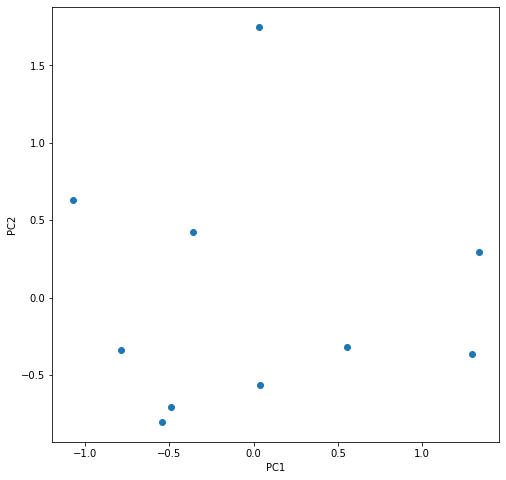

In [ ]:
# Step 4 - Exploring Data
md=pd.read_csv(r'https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')
print("Columns list: ", list(md.columns))
print("Dimensions:", md.shape, '\n')
print(md.head(3), '\n')
MDx=md[1:11]
MDx=(MDx=="Yes")+0
print(MDx.mean(), '\n')

pca=PCA().fit(MDx)
MDpca=pca.transform(MDx)
print('Variance:', list((pca.explained_variance_ratio_*100).round(4)))
plt.figure(figsize = (8,8))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(MDpca[:, 0], MDpca[:, 1])
plt.show()




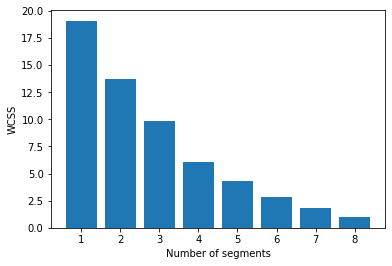

In [ ]:
# Step 5 - Extracting Segments
# 5.1
MDkm28=[]
for i in range(1, 9):
    km=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    y_kmeans = km.fit_predict(MDx)
    MDkm28.append(km.inertia_)
plt.bar(range(1, 9), MDkm28)
plt.xlabel('Number of segments')
plt.ylabel('WCSS')
plt.show()

MDk4=MDkm28[:4]

In [ ]:
import plotly.figure_factory as ff


names = MDx.columns
fig = ff.create_dendrogram(MDx, orientation='left', labels=names)
fig.update_layout(width=800, height=800, title_text=" Customer Dendograms")

fig.show()

In [ ]:
def biplot(score,coeff,pcax,pcay,labels=None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
        if labels is None:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

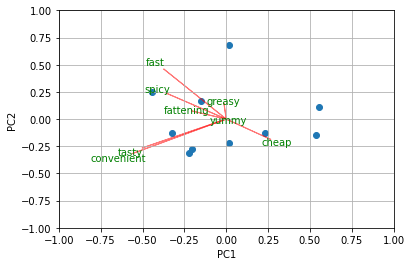

In [ ]:
biplot(MDpca[:,0:8],pca.components_,1,2,labels=MDx.columns)